In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in dialogue data
df = pd.read_csv('All-seasons.csv')
df.Line = [x.lower() for x in df.Line.str.replace('\n', '')]
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"you guys, you guys! chef is going away."
1,10,1,Kyle,going away? for how long?
2,10,1,Stan,forever.
3,10,1,Chef,i'm sorry boys.
4,10,1,Stan,"chef said he's been bored, so he joining a gro..."


In [122]:
#Let's look at the number of Seasons included in this data set
print('The seasons in the data set are {}'.format(df.Season.unique()))

The seasons in the data set are ['10' 'Season' '11' '12' '13' '14' '15' '16' '17' '18' '1' '2' '3' '4' '5'
 '6' '7' '8' '9']


We have all dialogues from seasons 1 to 18 this will be fun exploring different speaking patterns of characters.

Let's see who has the most lines through out all of southpark

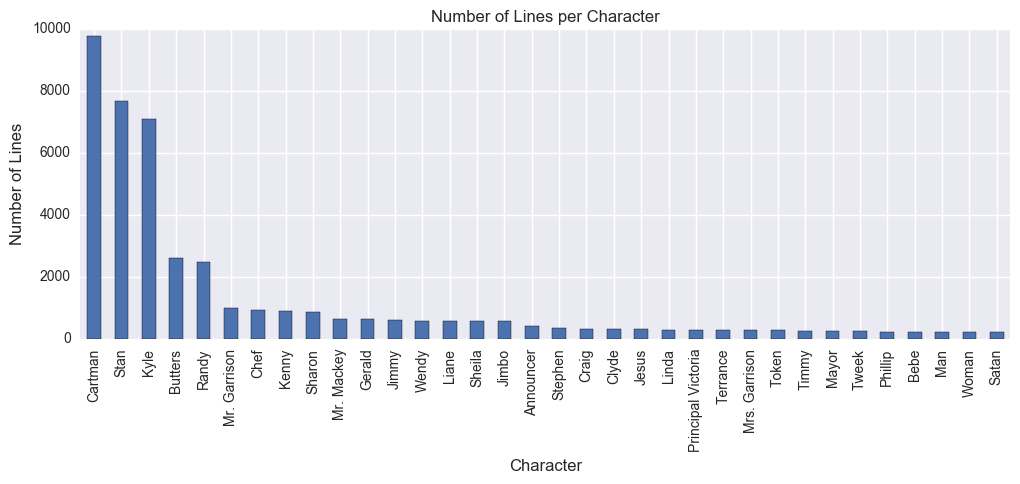

In [240]:
plt.figure(figsize=(12,4))
lines = pd.value_counts(df.Character.values, sort=True)
lines[lines>200].sort_values(ascending=False).plot(kind='bar')#only get characters with more than 50 lines
plt.ylabel('Number of Lines',fontsize=12)
plt.xlabel('Character',fontsize=12)
plt.title('Number of Lines per Character',fontsize=12)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


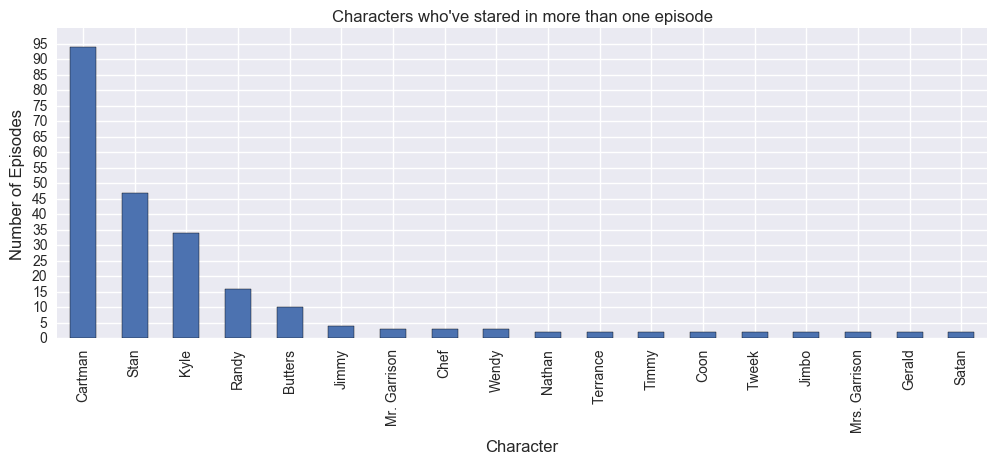

In [257]:
linePerEpisode = df.groupby(['Season','Episode','Character'],as_index=False).count()
starCharacter = linePerEpisode.sort('Line', ascending=False).groupby(['Season','Episode'], as_index=False).first()

plt.figure(figsize=(12,4))
numStar = pd.value_counts(pd.Series(starCharacter.Character),sort=True)
numStar[numStar>1].plot(kind='bar')
plt.title("Characters who've stared in more than one episode")
plt.ylabel('Number of Episodes',fontsize=12)
plt.xlabel('Character',fontsize=12)
plt.yticks(np.arange(0, 100, 5))
plt.show()



We can see that Cartman, Stan and Kyle are the man characters with Randy and Butters following are 4th and 5th.

Let's see on average how many sentences are in each line for a Character

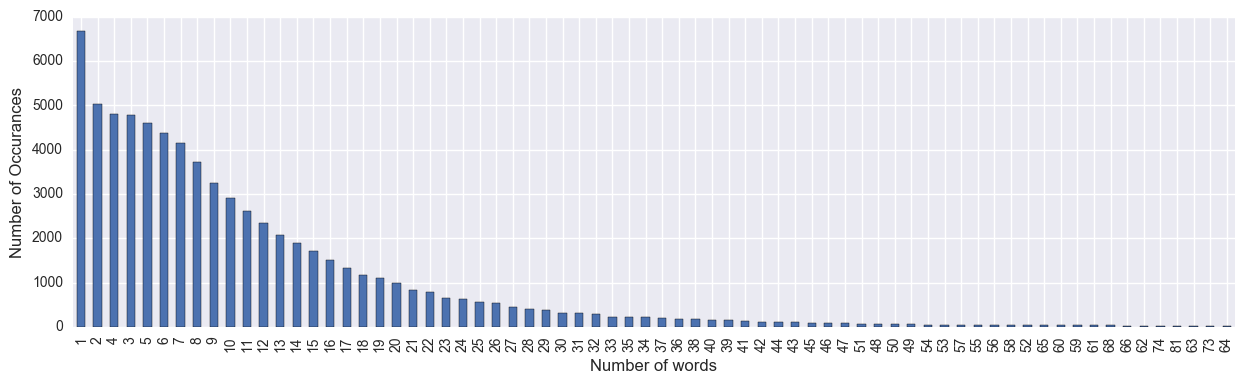

In [124]:
#create column that has number of sentences for a line
import nltk
df['num_words'] = df.Line.apply(lambda x : len(x.split()))
wordCount = pd.value_counts(df.num_words,sort=True)
plt.figure(figsize=(15,4))
wordCount[wordCount>20].plot(kind ='bar')
plt.ylabel('Number of Occurances',fontsize=12)
plt.xlabel('Number of words',fontsize=12)
plt.show()

The majority of lines are only 1 or 2 words let's see what the majority of these one words are

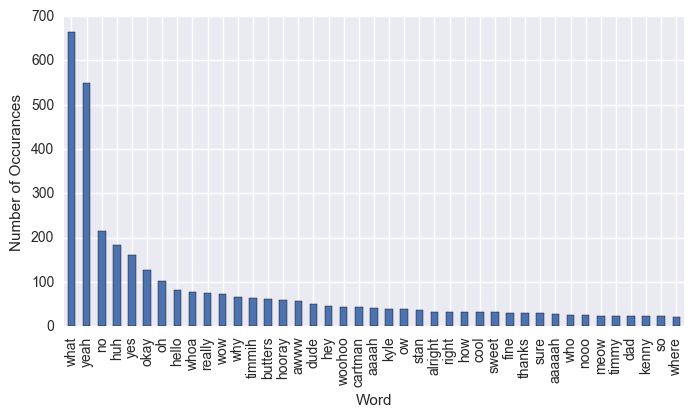

In [125]:
import re
oneWord = pd.value_counts(df[df.num_words==1].Line.apply(lambda x:re.sub(r'\W+', '', x)),sort=True)
plt.figure(figsize=(8,4))
oneWord[oneWord>20].plot(kind='bar')
plt.ylabel('Number of Occurances')
plt.xlabel('Word')
plt.show()

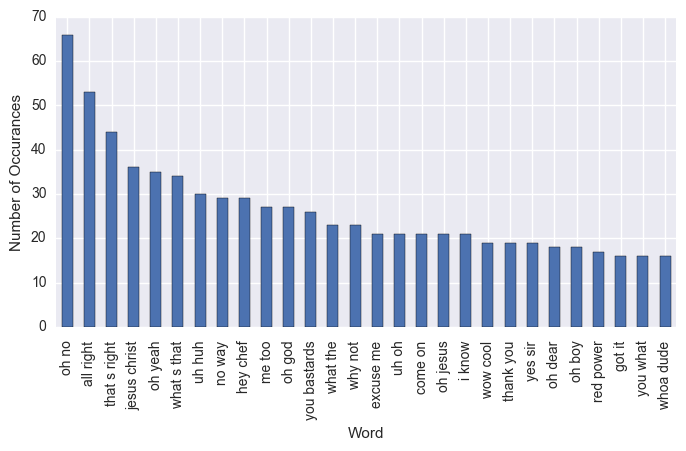

In [126]:
import re
twoWords = pd.value_counts(df[df.num_words==2].Line.apply(lambda x:re.sub(r'\W+', ' ', x)),sort=True)
plt.figure(figsize=(8,4))
twoWords[twoWords>15].plot(kind='bar')
plt.ylabel('Number of Occurances')
plt.xlabel('Word')
plt.show()

We can see some classic quotes such as Jesus christ, You bastards(everytime kennys dies), and Red Power(When cartman gets turned into a ginger)

Let's Explore how many Episodes each character stars in (Most lines in an episode)

These results follows the same trend of characters who have the most lines. 

Let's look at who has the potty mouth based on swear words per number of words they speak

**Swearing**

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


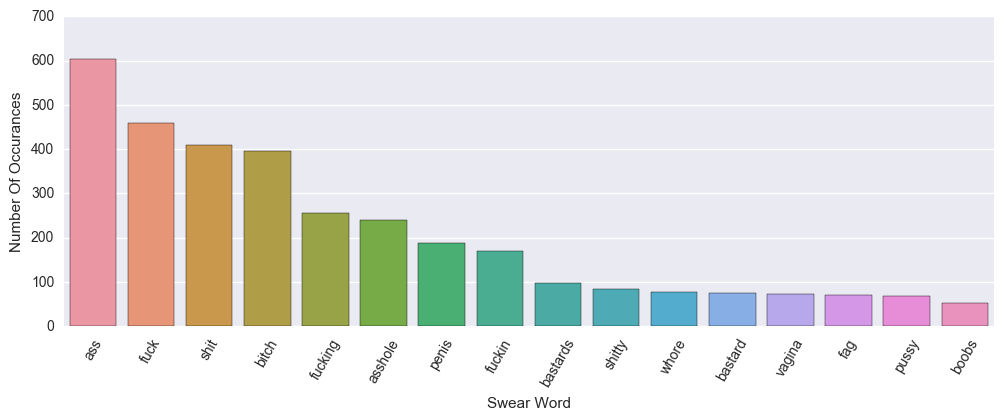

In [233]:
#Plot most common swear words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer().fit(bad_words)
swearWordVec = cv.transform(df.Line.apply(lambda x: re.sub(r'\W+', ' ', x)))
#get matrix with cum counts of each swear word
vocab_df = pd.DataFrame(list(cv.vocabulary_.items()),columns=['Word','Index']).set_index('Index').sort_index()
vocab_df['counts'] = np.array(swearWordVec.sum(axis=0))[0]
vocab_df.sort('counts',ascending=False,inplace=True)

plt.figure(figsize=(12,4))
sns.barplot(y='counts',x='Word',data=vocab_df[vocab_df.counts>50])
plt.xlabel('Swear Word')
plt.ylabel('Number Of Occurances')
plt.xticks(rotation=60)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:10: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


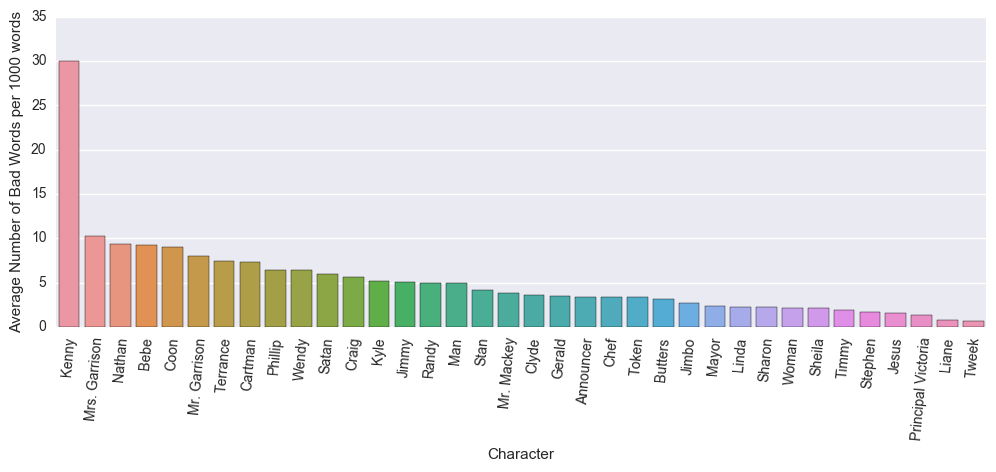

In [256]:
bad = open("badwords.txt", "r")#corpus of swear words found on http://www.phorum.org/phorum5/read.php?63,127769
bad_words = bad.read().split('\n')
#get number of bad words per line
df['num_badwords'] = df.Line.apply(lambda x : sum([1 if word in bad_words else 0 for word in re.sub(r'\W+', ' ', x).split(' ')]))
#get characters who've stared in more than 1 episode
numStar = pd.DataFrame(numStar)

pottyMouth = df.groupby('Character',as_index=False).sum()
stars = numStar[numStar.Character>1].index
pottyMouth = pottyMouth[pottyMouth.Character.isin(lines[lines>200].index+ stars)]
pottyMouth['badwords_per_1000words'] = 1000*pottyMouth.num_badwords/pottyMouth.num_words
pottyMouth.sort('badwords_per_1000words',inplace=True, ascending=False)


plt.figure(figsize=(12,4))
sns.barplot(y='badwords_per_1000words',x='Character',data=pottyMouth)
plt.xticks(rotation=85)
plt.ylabel('Average Number of Bad Words per 1000 words')
plt.show()

We can see that kenny has the dirtiest mouth of everyone with the Mrs. Garrison and nathan comming in 2nd and 3rd respectively. Tweek is the the respectful characters out of the main ones.

Instead of normalizing by number of lines, lets calculate average number of swear words per every word said.